<a href="https://colab.research.google.com/github/Dhiru-py/NLP/blob/master/Sentiment_Classifcation_using_RNN%2C_LSTM%2C_GRU_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment Analysis Using Recurrent Neural Network**

---



In this tutorial, we will use RNN for sentiment analysis task on movie review dataset.

**What is sentiment Analysis?**

Sentiment Analysis is nothing but finding the sentiments of reviews whether it is postive or negative review.

**Code**: https://keras.io/examples/imdb_lstm/

**Notes**
- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.
- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.

**Importing Libraries**

We start by importing the required dependencies to preprocess our data and build our model.

In [ ]:
# Import the dependencies
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN,LSTM, GRU
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

print("Imported dependencies.")


Imported dependencies.


**Loading Data**

We will use IMDB sentiment classification dataset which consists of 50,000 movie reviews from IMDB users that are labeled as either positive (1) or negative (0). 

Continue downloading the IMDB dataset, which is, fortunately, already built into Keras.

In [ ]:
max_words = 10000

# Define the training and test dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

print("Created test and training data.")
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Created test and training data.
25000 train sequences
25000 test sequences


**Exploring the data**

In [ ]:
import numpy as np

#concatenate whole data
data = np.concatenate((x_train, x_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

print("Categories:", np.unique(targets))
print("Number of unique words:", len(np.unique(np.hstack(data))))
length = [len(i) for i in data]
print("Average Review length:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))

Categories: [0 1]
Number of unique words: 9998
Average Review length: 234.75892
Standard Deviation: 173.0


You can see in the output above that the dataset is labeled into two categories, — 0 or 1, which represents the sentiment of the review. The whole dataset contains 9,998 unique words and the average review length is 234 words, with a standard deviation of 173 words.

In [ ]:
print('---review---')
print(x_train[0])
print('---label---')
print(y_train[0])

---review---
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
---label---
1


Above you can see the first review of the dataset, which is labeled as positive (1). The code below retrieves the dictionary mapping word indices back into the original words so that we can read them. It replaces every unknown word with a “#”. It does this by using the get_word_index() function.

In [ ]:
index = imdb.get_word_index()
train_text = []
test_text = []
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
for i in range(0,len(x_train)):
  train_text.append(" ".join( [reverse_index.get(i - 3, "#") for i in x_train[i]] ))
for i in range(0,len(x_test)):
  test_text.append(" ".join( [reverse_index.get(i - 3, "#") for i in x_test[i]] ))
print(len(train_text),len(test_text))

25000 25000


In [ ]:
train_text[0:5]

["# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you t

In [ ]:
test_text[0:5]

["# please give this one a miss br br # # and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite # so all you madison fans give this a miss",
 "# this film requires a lot of patience because it focuses on mood and character development the plot is very simple and many of the scenes take place on the same set in frances # the sandy dennis character apartment but the film builds to a disturbing climax br br the characters create an atmosphere # with sexual tension and psychological # it's very interesting that robert altman directed this considering the style and structure of his other films still the trademark altman audio style is evident here and there i think what really makes this film work is the brilliant performance by sandy dennis it's definitely one of her darker characters but she plays 

In [ ]:
# Data Preprocessing...
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import re

from nltk import word_tokenize
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
tokenizer = RegexpTokenizer(r'\w+')


def data_preprocessing (data):
  clean_data = []
  for sent in data:
    word_token = tokenizer.tokenize(sent)
    non_stopword = [word for word in word_token if word not in stopwords.words('english')]
    remove_words = [word for word in non_stopword if len(word) > 2] 
    joint_string = " ".join(remove_words)
    clean_data.append(joint_string)
  return (clean_data)
    
pre_processed_x_train_data = data_preprocessing (train_text)
pre_processed_x_train_data



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


5

In [ ]:
len(pre_processed_data)

5

**Data Preparation**

Now it's time to prepare our data. 

As we know, every review consists of different numner of words. Some reviews could even be one word long.

"nice"

Deep learning models look best when all of the data is in a similar shape. 

Pad_sequences will add 0's to any reviews which don't have a length of 100 (this is what we decided the max length to be, you can increase it).

For example, our one word review above would become: "nice 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0... x 100"

The same goes for any reviews longer than 100 characters, they will be shortened to a maximum of 100.

In [ ]:
from keras.preprocessing import sequence
max_review_length = 100
x_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_review_length)

In [ ]:
print(x_train[0])

[1415   33    6   22   12  215   28   77   52    5   14  407   16   82
    2    8    4  107  117 5952   15  256    4    2    7 3766    5  723
   36   71   43  530  476   26  400  317   46    7    4    2 1029   13
  104   88    4  381   15  297   98   32 2071   56   26  141    6  194
 7486   18    4  226   22   21  134  476   26  480    5  144   30 5535
   18   51   36   28  224   92   25  104    4  226   65   16   38 1334
   88   12   16  283    5   16 4472  113  103   32   15   16 5345   19
  178   32]


**BUILDING AND TRAINING THE MODEL**

Now our data is ready for some modelling!

Deep learning models have layers.

The top layer takes in the data we've just prepared, the middle layers do some math on this data and the final layer produces an output we can hopefully make use of.

In our case, our model has three layers, 

1. Embedding layer
2. LSTM layer
3. Dense layer.

Our model begins with the line model = Sequential(). Think of this as simply stating "our model will flow from input to output layer in a sequential manner" or "our model goes one step at a time".

**Embedding layer**

The Embedding layer makes creates a database of the relationships between words.

model.add(Embedding(max_words, embedding_vector_length, input_length=max_review_length)) is saying: add an Embedding layer to our model and use it to turn each of our words into a list of numbers 32 digits long which have some mathematical relationship to each other.

So each of our words will become a vector, 32 digits long, of numbers.

For example, the = [0.556433, 0.223122, 0.789654....].

Don't worry for now how this is computed, Keras does it for us.

**LSTM layer**

model.add(LSTM(128)) is saying: add a LSTM layer after our embedding layer in our model and give it 128 units.

LSTM = Long short-term memory. Think of LSTM's as a tap, a tap whichs decides which words flow through the model and which words don't. This layer uses 100 taps to decide which words matter the most in each review.

**Dense layer**

model.add(Dense(1, activation='sigmoid')) is saying: add a Dense layer to the end of our model and use a sigmoid activation function to produce a meaningful output.

A dense layer is also known as a fully-connected layer. This layer connects the 128 LSTM units in the previous layer to 1 unit. This last unit them takes all this information and runs it through a sigmoid function.

Essentially, the sigmoid function will decide if the information should be given a 1 or a -1. 1 for positive and -1 for negative. This is will decided on based on the information passed through by the LSTM layer.


Lastly, we let Keras print a summary of the model we have just built.

In [ ]:
# Define how long the embedding vector will be
embedding_vector_length = 32

# Define the layers in the model
model = Sequential()
model.add(Embedding(max_words, embedding_vector_length, input_length=max_review_length))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

print("Model created.")

Model created.


**Compiling the model**

Now we compile our model, which is nothing but configuring the model for training. We use the “adam” optimizer, an algorithm that changes the weights and biases during training. We also choose binary-crossentropy as loss (because we deal with binary classification) and accuracy as our evaluation metric.

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print("Model compiled, ready to be fit to the training data.")

Model compiled, ready to be fit to the training data.


**Summarize the model**

Making a summary of the model will give us an idea of what's happening at each layer.

In the embedding layer, each of our words is being turned into a list of numbers 32 digits long. Because there are 10000 words (max_words), there are 320,000 parameters (32 x 10000).

Parameters are individual pieces of information. The goal of the model is to take a large number of parameters and reduce them down to something we can understand and make use of (less parameters).

The LSTM layer reduces the number of parameters to 82432 4 × [128(128+32) + 128].

The final dense layer connects each of the outputs of the LSTM units into one cell (128 + 1).

In [ ]:
# Summarize the different layers in the model
print(model.summary())

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_25 (Embedding)     (None, 100, 32)           320000    
_________________________________________________________________
lstm_17 (LSTM)               (None, 128)               82432     
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 129       
Total params: 402,561
Trainable params: 402,561
Non-trainable params: 0
_________________________________________________________________
None


Now we're able to train our model. We'll do this with a batch_size of 500 and only for 5 epochs

**Fitting the model to the training data**

Now our model is compiled, it's ready to be set loose on our training data.

We're going to run 3 cycles (epochs=3) on groups of 64 reviews at a time (batch_size=64).

Because of our loss and optimzation functions, the model accuracy should improve after each cycle.

model.fit(X_train, y_train, epochs=3, batch_size=64) is saying: fit the model we've built on the training dataset for 3 cycles and go over 64 reviews at a time.

Feel free to change the number of epochs (more cycles) or batch_size (more or less information each step) to see how the accuracy changes.

This will take a little time depending on how powerful your computer is. On my MacBook Pro, it took around 10-minutes.

In [ ]:
# Fit the model to the training data
results = model.fit(x_train, y_train, epochs=3, batch_size=64,validation_data=(x_test, y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 96s 4ms/step - loss: 0.4365 - acc: 0.7876 - val_loss: 0.3686 - val_acc: 0.8402
Epoch 2/3
25000/25000 [==============================] - 95s 4ms/step - loss: 0.2783 - acc: 0.8875 - val_loss: 0.3722 - val_acc: 0.8353
Epoch 3/3
25000/25000 [==============================] - 95s 4ms/step - loss: 0.2140 - acc: 0.9190 - val_loss: 0.3976 - val_acc: 0.8426


It is time to evaluate our model:

In [ ]:
model.evaluate(x_test, y_test,batch_size=64)


25000/25000 [==============================] - 23s 903us/step


[0.3976256137752533, 0.8425999879837036]

In [ ]:
results.history

{'acc': [0.78756, 0.88748, 0.91896],
 'loss': [0.436547036857605, 0.27833643086433413, 0.21404061092376708],
 'val_acc': [0.8402400016784668, 0.8352800011634827, 0.8425999879837036],
 'val_loss': [0.36858300020217893, 0.37218918320655825, 0.3976256137752533]}

In [ ]:
import matplotlib.pyplot as plt
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

KeyError: ignored

**Extensions**

Let us use LSTM variants. We use check the accuracy by replacing LSTM cell with GRU cell.

In [ ]:
# Define the layers in the model
model = Sequential()
model.add(Embedding(max_words, 64, input_length=max_review_length))
#model.add(LSTM(128))
model.add(GRU(32,dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

#num_params_layer 3 × [h(h+i) + h]  = 3 × [32(32+64) + 32] = 9312

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_23 (Embedding)     (None, 100, 64)           640000    
_________________________________________________________________
gru_8 (GRU)                  (None, 32)                9312      
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 33        
Total params: 649,345
Trainable params: 649,345
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

In [ ]:
# Fit the model to the training data
results = model.fit(x_train, y_train, epochs=3, batch_size=64,validation_data=(x_test, y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 33s 1ms/step - loss: 1.5745 - accuracy: 0.6951 - val_loss: 0.5619 - val_accuracy: 0.7156
Epoch 2/3
25000/25000 [==============================] - 33s 1ms/step - loss: 0.4705 - accuracy: 0.7965 - val_loss: 0.5555 - val_accuracy: 0.7084
Epoch 3/3
25000/25000 [==============================] - 36s 1ms/step - loss: 0.4343 - accuracy: 0.8068 - val_loss: 0.5490 - val_accuracy: 0.7122


In [ ]:
score, acc = model.evaluate(x_test, y_test,
                            batch_size=64)
print('Test score:', score)
print('Test accuracy:', acc)

25000/25000 [==============================] - 23s 900us/step
Test score: 0.3668933403587341
Test accuracy: 0.8421199917793274


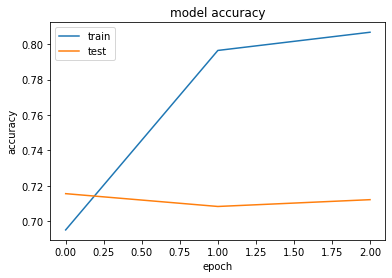

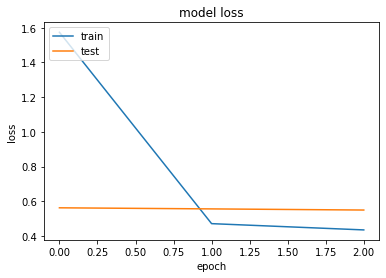

In [ ]:
import matplotlib.pyplot as plt
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Using LSTM stack layers**

In [ ]:
model= Sequential()
model.add(Embedding(max_words, embedding_vector_length, input_length=max_review_length))
model.add(LSTM(units=16, return_sequences=True))
model.add(LSTM(units=8, return_sequences=True))
model.add(LSTM(units=4))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_21 (Embedding)     (None, 100, 32)           320000    
_________________________________________________________________
lstm_13 (LSTM)               (None, 100, 16)           3136      
_________________________________________________________________
lstm_14 (LSTM)               (None, 100, 8)            800       
_________________________________________________________________
lstm_15 (LSTM)               (None, 4)                 208       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 5         
Total params: 324,149
Trainable params: 324,149
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

In [ ]:
# Fit the model to the training data
results = model.fit(x_train, y_train, epochs=3, batch_size=64,validation_data=(x_test, y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 51s 2ms/step - loss: 0.5168 - accuracy: 0.7573 - val_loss: 0.3961 - val_accuracy: 0.8371
Epoch 2/3
25000/25000 [==============================] - 49s 2ms/step - loss: 0.3170 - accuracy: 0.8789 - val_loss: 0.3802 - val_accuracy: 0.8372
Epoch 3/3
25000/25000 [==============================] - 48s 2ms/step - loss: 0.2427 - accuracy: 0.9130 - val_loss: 0.3807 - val_accuracy: 0.8351


In [ ]:
score, acc = model.evaluate(x_test, y_test,
                            batch_size=64)
print('Test score:', score)
print('Test accuracy:', acc)

25000/25000 [==============================] - 7s 289us/step
Test score: 0.38072913663864133
Test accuracy: 0.8350800275802612


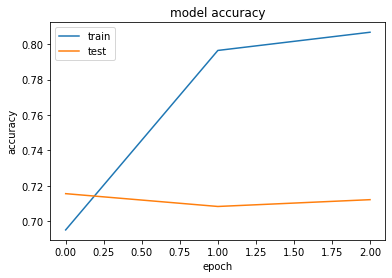

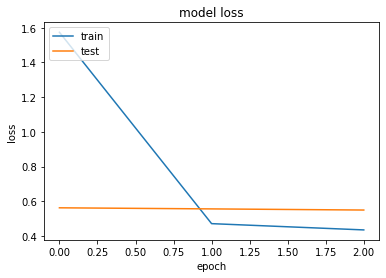

In [ ]:
import matplotlib.pyplot as plt
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Using Simple RNN**

In [ ]:
# Define the layers in the model
model = Sequential()
model.add(Embedding(max_words, 64, input_length=max_review_length))
#model.add(LSTM(128))
model.add(SimpleRNN(32,dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_20 (Embedding)     (None, 100, 64)           640000    
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                3104      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 33        
Total params: 643,137
Trainable params: 643,137
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

In [ ]:
# Fit the model to the training data
results = model.fit(x_train, y_train, epochs=3, batch_size=64, validation_data=(x_test, y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 17s 661us/step - loss: 0.6974 - accuracy: 0.5304 - val_loss: 0.6747 - val_accuracy: 0.5883
Epoch 2/3
25000/25000 [==============================] - 16s 635us/step - loss: 0.6503 - accuracy: 0.6065 - val_loss: 0.5780 - val_accuracy: 0.7064
Epoch 3/3
25000/25000 [==============================] - 16s 640us/step - loss: 0.5734 - accuracy: 0.6992 - val_loss: 0.5939 - val_accuracy: 0.6808


In [ ]:
score, acc = model.evaluate(x_test, y_test,
                            batch_size=64)
print('Test score:', score)
print('Test accuracy:', acc)

25000/25000 [==============================] - 3s 109us/step
Test score: 0.5939291256332397
Test accuracy: 0.6807600259780884


In [ ]:
results.history

{'accuracy': [0.53044, 0.60652, 0.6992],
 'loss': [0.6973857205200196, 0.6503094379043579, 0.573438881072998],
 'val_accuracy': [0.5882800221443176, 0.7063999772071838, 0.6807600259780884],
 'val_loss': [0.6746630340385437, 0.5780444443893432, 0.5939291256332397]}

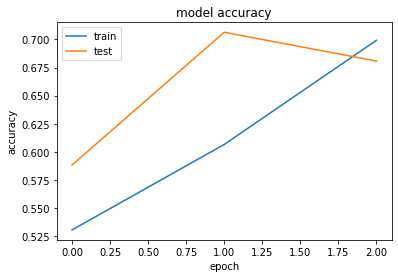

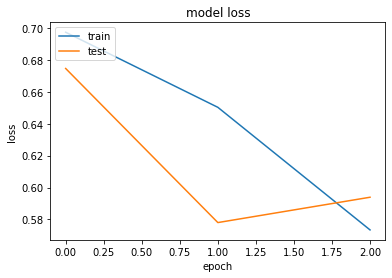

In [ ]:
import matplotlib.pyplot as plt
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
